# Importation des données

In [30]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme() 
import pandas as pd
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ajouter un joli titre

In [143]:
data = pd.read_csv("data/data.csv.gz", compression="gzip")

#Pour le data complet
labels = pd.read_csv('data/labels.csv')
data = pd.merge(data, labels, on="Unnamed: 0", how="inner")  
data.set_index('Unnamed: 0', inplace=True)

Xsubset = data.drop(columns=["Class"]).iloc[:,1:]
#Xsubset = data.iloc[:,1:]

# Standardisation des donnees
scale = StandardScaler()
Xsubset_2 = scale.fit_transform(Xsubset)

Xsubset_2 = pd.DataFrame(Xsubset_2, columns=Xsubset.columns)

In [144]:
# Réalisation de l'ACP
pca = PCA()
pca.fit(Xsubset_2)
components = pca.fit_transform(Xsubset_2)

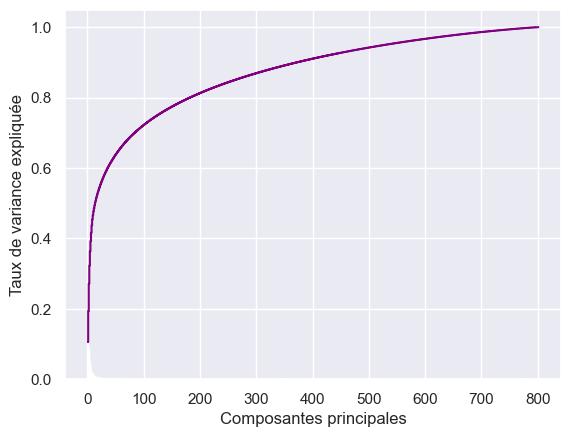

In [145]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, alpha=1, align='center')
plt.step(range(1,len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_), where='mid', color='purple')

# Ajout des légendes
plt.ylabel('Taux de variance expliquée') #violet : Variance expliquée cumulée
plt.xlabel('Composantes principales')
plt.show()

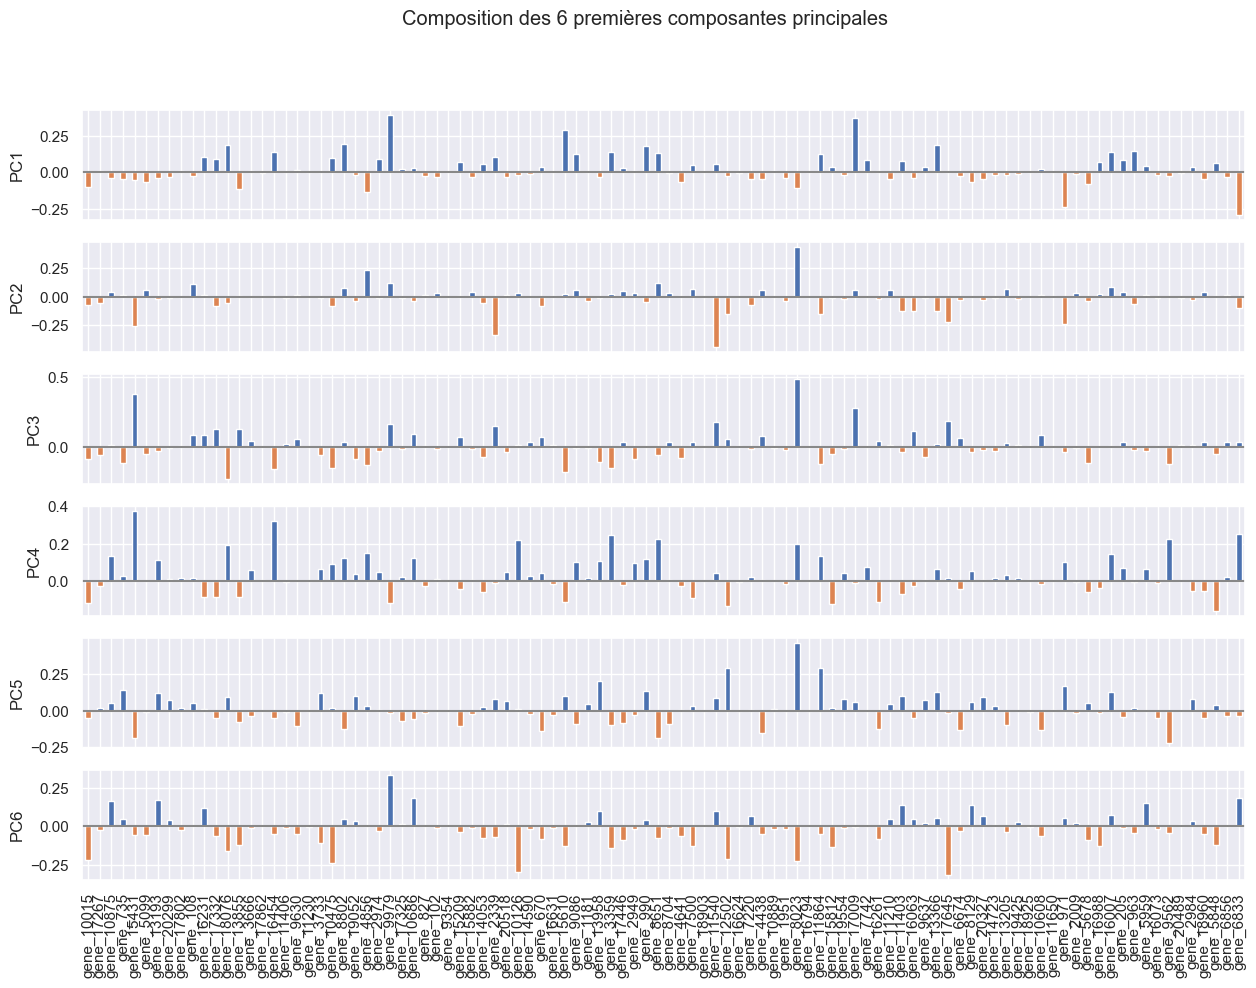

In [134]:
data_reduced = data.drop(columns=['Unnamed: 0', 'Class'])
elements = data_reduced.columns
pcs = pca.fit(data_reduced)
n_axes = 6
loadings = pd.DataFrame(pcs.components_[0:n_axes, :], columns=elements)

#print(np.round(loadings,2))
maxPC = 1.01 * np.max(np.abs(loadings.loc[0:n_axes, :]))
f, axes = plt.subplots(n_axes, 1, figsize=(15, 10), sharex=True)
for i, ax in enumerate(axes):
    pc_loadings = loadings.loc[i, :]
    colors = ['C0' if l>0 else 'C1' for l in pc_loadings]
    ax.axhline(color='#888888')
    pc_loadings.plot.bar(ax=ax, color=colors)
    ax.set_ylabel(f'PC{i+1}')
f.suptitle("Composition des " + str(n_axes) + " premières composantes principales")
plt.show()

In [146]:
# Intégrer les valeurs selon les quatre axes principaux dans le DataFrame
data["PC 1"] = components[:,0]
data["PC 2"] = components[:,1]
data["PC 3"] = components[:,2]
data["PC 4"] = components[:,3]
data["PC 5"] = components[:,4]
data["PC 6"] = components[:,5]

for i in range(1,6,2):
    j = i+1

    color_map = {
        'Class1': '#5A88D4',
        'Class2': '#3B79C4',
        'Class3': '#2A5A91',
        'Class4': '#9A4FC4',
        'Class5': '#7D2A7F' 
    }

    # AFFICHAGE : Représentation des clusterings selon les axes factoriels
    fig = px.scatter(data,
                    x = f"PC {i}",
                    y = f"PC {j}",
                    color = "Class",
                    color_discrete_map=color_map,
                    #hover_name = "Class",
                    labels = {
                        f"PC {i}": f"PC {i} ("+str(round(pca.explained_variance_ratio_[i-1]*100,2))+"%)",
                        f"PC {j}": f"PC {j} ("+str(round(pca.explained_variance_ratio_[j-1]*100,2))+"%)",
                    },
                    color_continuous_scale="ylgnbu")

    fig.update_traces(textposition='top center')
    fig.update_traces(
        marker = dict(size=12,
                    line=dict(width=2,
                                color='DarkSlateGrey')),
                                selector=dict(mode='markers'))


    fig.update_traces(textposition='top center')
    fig.update_traces(marker=dict(size=12, line=dict(width=2,
                                                    color='DarkSlateGrey')),
                                                    selector=dict(mode='markers'))

    fig.update_layout(
        height=600, width=1000, font=dict(size=8),
        title_text=f'ACP des formations (axes {i} et {j}) selon les types de cancer')

    fig.show()

